# Optimization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [6]:
from scipy.optimize import minimize

In [7]:
def f(x):
    return (x-3)**2

res = minimize(f,2)

In [8]:
res.x

array([2.99999999])

In [14]:
f = lambda x: (x[0] - 1)**2 + (x[1]-2.5)**2
# constraints
cons = ({'type':'ineq','fun':lambda x:x[0]-2*x[1]+2},
        {'type':'ineq','fun': lambda x:-x[0]-2*x[1]+6},
        {'type':'ineq','fun': lambda x:-x[0]+x[1]+2})

bnds = ((0,None),(0,None))
res = minimize(f,(2,0),bounds = bnds,constraints = cons)

In [15]:
res.x

array([1.4, 1.7])

In [16]:
minimize? # help 

# Interpolation

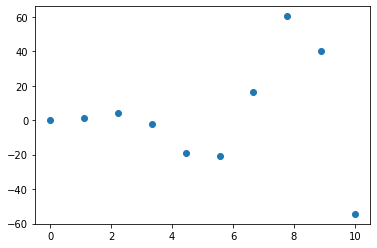

In [18]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [27]:
from scipy.interpolate import interp1d

In [36]:
f = interp1d(x,y,kind = 'linear')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

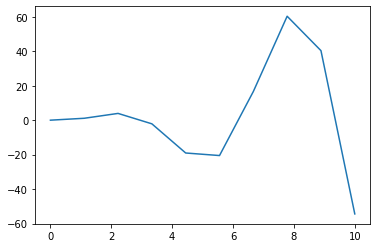

In [37]:
plt.plot(x_dense,y_dense)

# Curve Fitting

In [38]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2

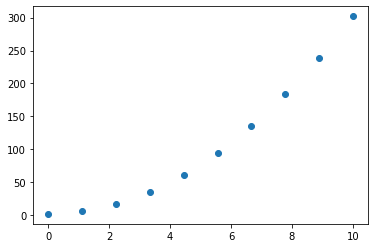

In [39]:
plt.scatter(x_data,y_data)

In [44]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x**2 +b

popt, pcov = curve_fit(func,x_data,y_data,p0=(1,1))

In [45]:
popt

array([3., 2.])

# Speical Functions

In [46]:
from scipy.special import legendre

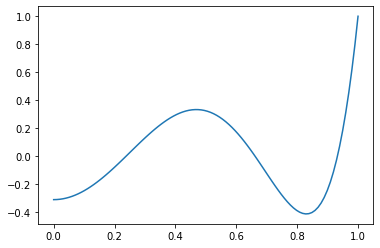

In [48]:
x = np.linspace(0,1,100)
plt.plot(x,legendre(6)(x))
plt.show()

In [52]:
from scipy.special import jv

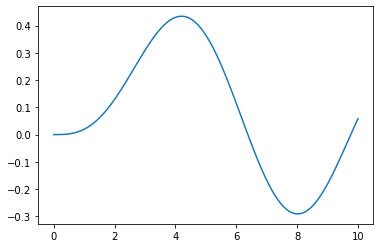

In [54]:
x = np.linspace(0,10,100)
plt.plot(x,jv(3,x))
plt.show()

# Differentiation

In [55]:
from scipy.misc import derivative

In [58]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0,1,100)

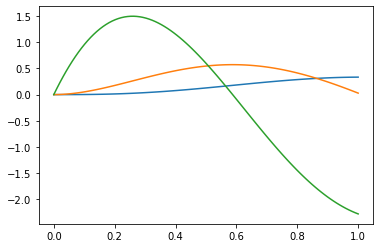

In [65]:
plt.plot(x,f(x))
plt.plot(x,derivative(f,x,dx = 1e-6))
plt.plot(x,derivative(f,x,dx = 1e-6,n=2)) # higher order derivatives

# Integration

$$\int_0^1 x^2 \sin(2x) e^{-x}dx$$

In [66]:
from scipy.integrate import quad

In [67]:
integrand = lambda x: x**2 *np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand,0,1)

$$\int_0^1\int_{-x}^{x^2} \sin(x+y^2)dydx$$

In [70]:
from scipy.integrate import dblquad

In [71]:
integrand = lambda x, y:np.sin(x+y**2)
#upper and lower bound are both functions
lwr_y = lambda x:-x
upr_y = lambda x:x**2
integral, integral_error = dblquad(integrand,0,1,lwr_y,upr_y)

# Differential Equations

Air friction while falling

$$v'-\alpha v^2+\beta = 0, v(0)=0$$

In [56]:
from scipy.integrate import odeint

All the information about ODE

In [57]:
def dvdt(v,t):
    #set parameters as 3 and 5
    return 3*v**2 - 5
v0 = 0

In [58]:
#solve the ODE
t = np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)

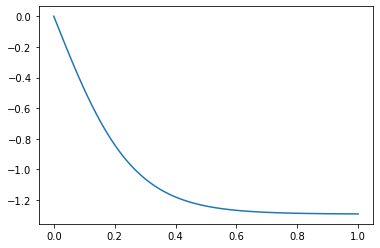

In [59]:
plt.plot(t,sol.T[0])

$$y_1'=y_1+y_2^2+3x,y_1(0)=0$$
$$y_2'=3y_1+y_2^3-\cos(x),y_2(0)=0$$

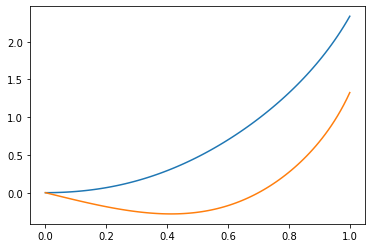

In [60]:
def dSdx(S,x):
    y1, y2 = S
    return [y1+y2**2+3*x,3*y1+y2**3-np.cos(x)]

y1_0=0
y2_0=0
S_0 = (y1_0,y2_0)
x = np.linspace(0,1,100)
sol = odeint(dSdx,S_0,x)
y1 = sol.T[0]
y2 = sol.T[1]
plt.plot(x,y1)
plt.plot(x,y2)

In [61]:
odeint?

# Linear Algebra

In [95]:
from scipy.linalg import solve_triangular
a = np.array([[3,0,0,0],
              [2,1,0,0],
              [1,0,1,0],
              [1,1,1,1]])
b = np.array([4,2,4,2])
x =solve_triangular(a,b,lower = True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

# Eigenvalue Problem

In [96]:
from scipy.linalg import eigh_tridiagonal

In [97]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w,v = eigh_tridiagonal(d,e)

In [99]:
v.T

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [100]:
A = np.diag(d) + np.diag(e,k=1)+np.diag(e,k=-1)

In [105]:
A@v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [1]:
w[1]*v.T[1]

NameError: name 'w' is not defined

In [2]:
import ipywidgets as widgets

In [3]:
widgets.IntSlider()

IntSlider(value=0)

In [4]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [5]:
w.close()

In [6]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [7]:
w.value

53

In [8]:
w.value = 100

In [9]:
display(w)

IntSlider(value=100)

In [10]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [11]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [14]:
import ipywidgets as widgets
from IPython.display import display

a = widgets.IntSlider(value=5, min=0, max=10)

def f1(a):
    display(a)

def f2(a):
    display(a * 2)

out1 = widgets.interactive_output(f1, {'a': a})
out2 = widgets.interactive_output(f2, {'a': a})

display(a)
display(out1)
display(out2)

IntSlider(value=5, max=10)

Output()

Output()

In [15]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [17]:
@widgets.interact
def f(x = 5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [18]:
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…

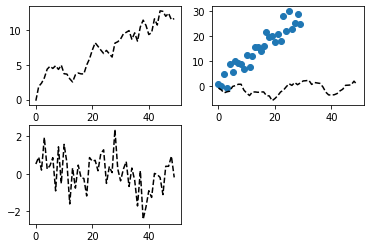

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
plt.plot(np.random.randn(50).cumsum(),'k--')
ax2 = fig.add_subplot(2,2,2)
plt.plot(np.random.randn(50).cumsum(),'k--')
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50),'k--')
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

In [31]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

Text(0.5, 0, 'Stage')

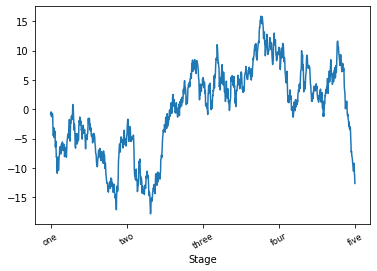

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation = 30, fontsize = 'small')
ax.set_xlabel('Stage')

In [40]:
from numpy.random import randn

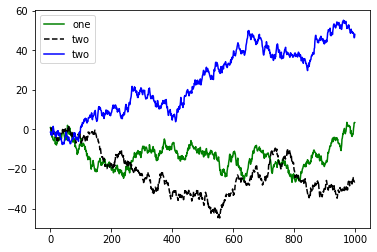

In [55]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'g',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'b',label='two')
ax.legend(loc='best')
plt.savefig('test.png')

In [53]:
plt.plot?

AttributeError: 'Axes' object has no property 'axisbg'

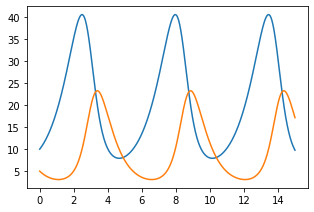

In [62]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

b = 0.1
d = 0.75
a=1
c=1.5
def dX_dt(X, t=0, a=1, c=1.5):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,  
                     -c*X[1] + d*b*X[0]*X[1] ])


t = np.linspace(0, 15,  1000)              # time
X0 = np.array([10, 5])          # initials conditions: 10 rabbits and 5 foxes  

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

l1, l2 = plt.plot(t, integrate.odeint(dX_dt, X0, t, (a, c)))

axcolor = 'black'
ax_a = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
ax_c = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sa = Slider(ax_a, 'a', 0.1, 10.0, valinit=1)
sc = Slider(ax_c, 'c', 0.1, 10.0, valinit=1.5)


def update(val):
    a = sa.val
    c = sc.val
    x = integrate.odeint(dX_dt, X0, t, (a, c))
    l1.set_ydata(x[:,0])
    l2.set_ydata(x[:,1])
    fig.canvas.draw_idle()

sa.on_changed(update)
sc.on_changed(update)

plt.show()